# **Age Height analysis using Linear Regression**

**Get the Data**

In [ ]:
!wget 'https://archive.org/download/ages-and-heights/AgesAndHeights.pkl'

In [ ]:
import pandas as pd
raw_data = pd.read_pickle('AgesAndHeights.pkl')
raw_data

**Visualize The Data**

In [ ]:
raw_data.hist()

In [6]:
raw_data.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


**Data Cleaning**

In [ ]:
cleaned_data = raw_data[raw_data['Age'] > 0] # removed aes less than 0
cleaned_data

In [9]:
cleaned_data.describe()

,Age,Height
count,93.000000,93.000000
mean,8.595192,47.164420
std,4.975428,10.190036
min,0.195686,29.007696
25%,5.020210,38.287710
50%,8.433330,47.332750
75%,11.923862,54.751892
max,17.887852,68.170414


**Visualize Cleaned data**

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>]], dtype=object)

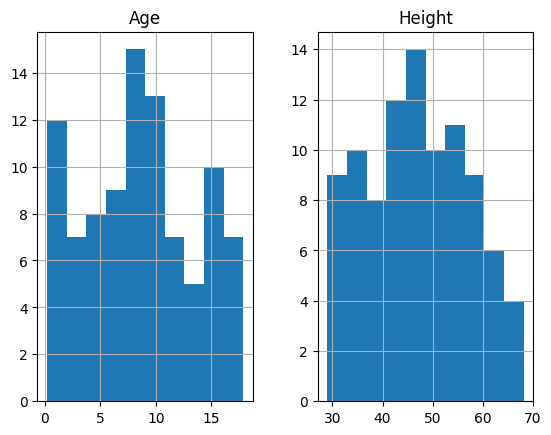

In [10]:
cleaned_data.hist()

In [13]:
import matplotlib.pyplot as plt

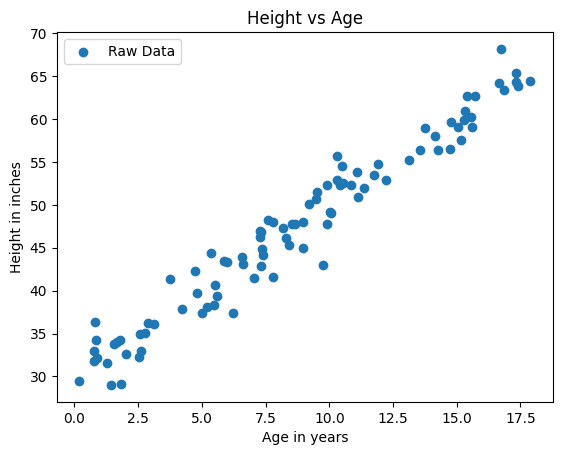

In [15]:
ages = cleaned_data['Age']
heights = cleaned_data['Height']
plt.scatter(ages, heights, label="Raw Data")
plt.title('Height vs Age')
plt.xlabel('Age in years')
plt.ylabel('Height in inches')
plt.legend()

**Build Model & Train**

In [ ]:
y = alpha + beta * x + epsilon
y_hat = alpha + beta * x

In [1]:
parameters = {'alpha':40, 'beta':4 }

In [3]:
def y_hat(age, params):
  alpha = params['alpha']
  beta = params['beta']
  return alpha + beta * age

In [4]:
y_hat(5, parameters)

60

In [5]:
def learn_parameters(data, params):
    x, y = data['Age'], data['Height']
    x_bar, y_bar = x.mean(), y.mean()
    x, y = x.to_numpy(), y.to_numpy()
    beta = sum( ((x-x_bar) * (y-y_bar)) / sum( (x-x_bar)**2))
    alpha = y_bar - beta * x_bar
    params['alpha'] = alpha
    params['beta'] = beta

In [16]:
new_parameter = {'alpha' : -2, 'beta' : 1000}
learn_parameters(cleaned_data, new_parameter)
new_parameter

{'alpha': 29.96185761461583, 'beta': 2.0014168989106316}

**Plotting Trained Predicted Values**

In [18]:
spaced_ages = list(range(19))
spaced_untrained_predictions = [y_hat(x, parameters) for x in spaced_ages]
print(spaced_untrained_predictions)

[40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112]


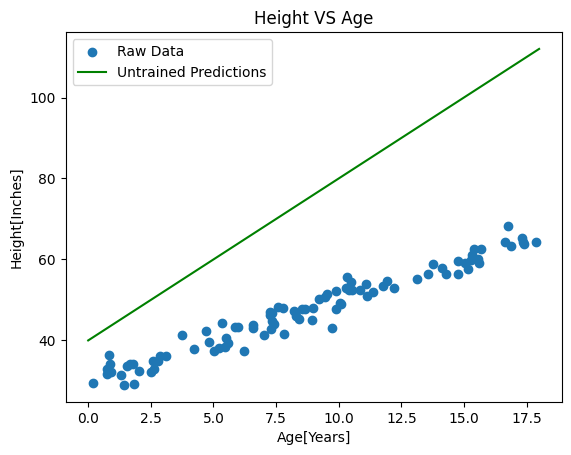

In [19]:
ages = cleaned_data['Age']
heights = cleaned_data['Height']
plt.scatter(ages,heights, label='Raw Data')
plt.plot(spaced_ages, spaced_untrained_predictions, label = 'Untrained Predictions', color = 'green')
plt.title('Height VS Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()
plt.show()

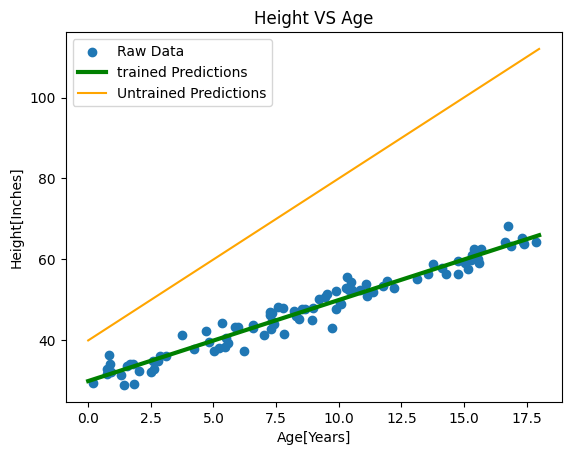

In [21]:
ages = cleaned_data['Age']
heights = cleaned_data['Height']

spaced_trained_predictions = [y_hat(x, new_parameter) for x in spaced_ages]

plt.scatter(ages,heights, label='Raw Data')
plt.plot(spaced_ages, spaced_trained_predictions, label = 'trained Predictions', color = 'green', lw=3)
plt.plot(spaced_ages, spaced_untrained_predictions, label = 'Untrained Predictions', color = 'orange')
plt.title('Height VS Age')
plt.xlabel('Age[Years]')
plt.ylabel('Height[Inches]')
plt.legend()
plt.show()

**Make Predictions**

In [29]:
new_age = int(input('Enter age to predict height: '))
y_hat(new_age, new_parameter)

Enter age to predict height: 24


77.99586318847099